In [1]:
import networkx as nx   ## only work on nx 2.X
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## hide warning messages 
import warnings
warnings.filterwarnings('ignore')

## Introduction to network analysis

### 1. Basics  - create graph

##### Undirected graph

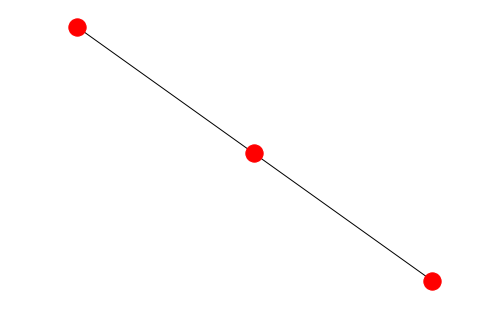

In [2]:
## create an empty graph(no direction)
G = nx.Graph()
## add edges 
G.add_edge('A','B')
G.add_edge('B','C')
## draw graph
nx.draw(G)

##### Directed graph

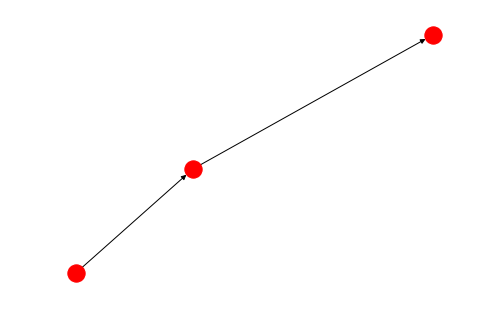

In [3]:
## create an empty graph(direction)
G_d = nx.DiGraph()
## add edges 
G_d.add_edge('A','B')
G_d.add_edge('B','C')
## draw graph
nx.draw(G_d)

##### Weighted graph

In [4]:
## create an empty graph(direction)
G_dw = nx.DiGraph()
## add edges 
G_dw.add_edge('A','B',weight=6)
G_dw.add_edge('B','C',weight=13)

##### Signed graph

In [5]:
G = nx.Graph()
## add edges 
G.add_edge('A','B',sign='+')
G.add_edge('B','C',sign='-')

##### Other edge attributes

In [6]:
G = nx.Graph()
## add edges 
G.add_edge('A','B',relation='fried')
G.add_edge('B','C',relation='coworker')

#### Multigraphs

In [7]:
G = nx.MultiGraph()
## add edges  # same pair, different attributes
G.add_edge('A','B',weight = 6, att1='friend')       # attribute name you can define by yourslef
G.add_edge('A','B',weight = 8, att2='coworker')
G.add_edge('B','C',weight = 8, att2='coworker')

0

### 2. How to access graph properties

In [8]:
G = nx.DiGraph()
## add edges  # same pair, different attributes
G.add_edge('A','B',weight = 6, att1='friend')       # attribute name you can define by yourslef
G.add_edge('B','A',weight = 16, att1='friend')
G.add_edge('B','C',weight = 8, att1='coworker')

##### edge info

In [9]:
# basic edge info
G.edges()

OutEdgeView([('A', 'B'), ('B', 'A'), ('B', 'C')])

In [10]:
# basic info with data 
G.edges(data=True)

OutEdgeDataView([('A', 'B', {'weight': 6, 'att1': 'friend'}), ('B', 'A', {'weight': 16, 'att1': 'friend'}), ('B', 'C', {'weight': 8, 'att1': 'coworker'})])

In [11]:
## only info with certain attribute
G.edges(data='att1')

OutEdgeDataView([('A', 'B', 'friend'), ('B', 'A', 'friend'), ('B', 'C', 'coworker')])

##### access edge info by node

In [12]:
G['A']['B'] # because it is a multi directed graph, it will give two diectionary of edge attributes

{'att1': 'friend', 'weight': 6}

In [13]:
# direction matters
G['B']['A']

{'att1': 'friend', 'weight': 16}

### 3. Node attributes

In [14]:
G = nx.MultiDiGraph()
## add edges  # same pair, different attributes
G.add_edge('A','B',weight = 6, att1='friend')       # attribute name you can define by yourslef
G.add_edge('A','B',weight = 26, att2='coworker')
G.add_edge('B','A',weight = 16, att1='friend')
G.add_edge('B','C',weight = 8, att1='coworker')

0

In [15]:
G.nodes()

NodeView(('A', 'B', 'C'))

In [16]:
## add node attribute, 1 
# add node again
G.add_node('A',role='trader')
G.add_node('B',role='manager')
G.nodes(data=True)

NodeDataView({'A': {'role': 'trader'}, 'B': {'role': 'manager'}, 'C': {}})

In [17]:
## add node attribute, 2
attrs = {'A':'economist','B':'trader'}
nx.set_node_attributes(G,attrs,'attr1')
G.nodes(data=True)

NodeDataView({'A': {'role': 'trader', 'attr1': 'economist'}, 'B': {'role': 'manager', 'attr1': 'trader'}, 'C': {}})

### 4. Bipartite Graphs

In [18]:
B = nx.Graph()
B.add_nodes_from(['A','B','C','D'],bipartite=0)
B.add_nodes_from([1,2,3,4],bipartite=1)
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',2),('E',3),('E',4)])

In [19]:
from networkx.algorithms import bipartite

In [20]:
bipartite.is_bipartite(B) ## check if is bipartite

True

In [21]:
X = set([1,2,3,4])
bipartite.is_bipartite_node_set(B,X) ## chick if a node list is one patition of the bipartite

True

In [22]:
X = set([1,2,3,4,'B'])
bipartite.is_bipartite_node_set(B,X) ## chick if a node list is one patition of the bipartite

False

- project graph based on bipartite structure

In [23]:
X = set([1,2,3,4])
P = bipartite.projected_graph(B,X) ## create subgraph based on if L or R has common neighbor

In [24]:
## there is also L-Bipartite weighted graph projection, adding weight info
X = set([1,2,3,4])
P = bipartite.weighted_projected_graph(B,X) 

### 4. Some examples 

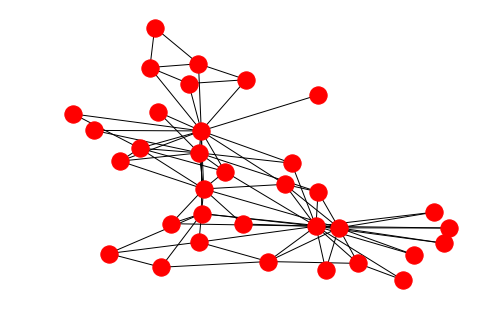

In [25]:
## load famous karate_club_graph, built-in in nx 
G = nx.karate_club_graph()
nx.draw(G)

In [26]:
## you can also read and write to file 
nx.write_gml(G,'data/karate.gml')
## read gml back 
G = nx.read_gml('data/karate.gml')

### Graph using nwtworkx 

- e.g: change node color based on degree centrality

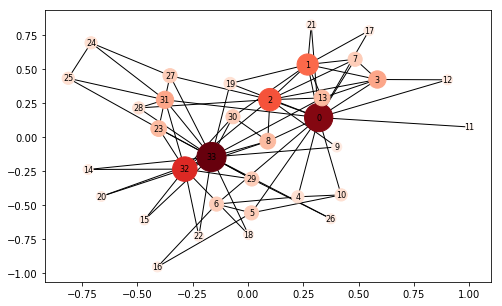

In [27]:
## graph, scale nodes absed one degree centrality 
## not in python k.values() returns dict_values, we need to turn it into list 
k = dict(nx.degree(G))  ## networkx 2.X changed the api
layout = nx.spring_layout(G)
plt.figure(1, figsize=(8,5))
nx.draw_networkx(G,
                 pos=layout,
                 nodelist=k.keys(),
                 node_size = [d*50 for d in list(k.values())],  ## change the size of the node, based on degree
                 node_color=list(k.values()),                   ## change color abased on degree
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

#### 2. Adjacency matrix 

In [28]:
## pass in node sequence, to make sure the order is correct 
node_list = list(G.nodes())  ## nx 2.x 
node_list.sort()
A = nx.to_numpy_matrix(G = G,nodelist=node_list,weight='weight')  #,weight ='CDIS_IAD', you can assign weight as well
A

matrix([[ 0.,  1.,  1., ...,  1.,  1.,  0.],
        [ 1.,  0.,  0., ...,  1.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 1.,  1.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

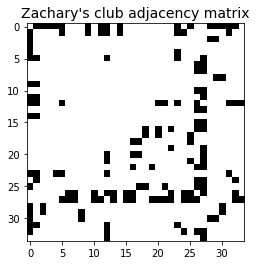

In [29]:
# show adjacency matrix
plt.figure(1, figsize=(4, 4))
plt.imshow(A,
           cmap="Greys",
           interpolation="none"
           )
plt.title('Zachary\'s club adjacency matrix', fontsize=14)

In [30]:
## with adj matrix you can find node degree using matrix 
## assuming all weigts are 1 
k = np.sum(A,axis=0)
k 
## of course you can use G.degree() to get degrees 

matrix([[ 16.,   9.,   3.,   1.,   2.,   5.,   2.,   2.,   2.,   2.,   2.,
           3.,  10.,   2.,   2.,   2.,   5.,   3.,   3.,   2.,   4.,   3.,
           4.,   6.,   4.,   6.,  12.,  17.,   3.,   4.,   4.,   4.,   5.,
           2.]])

#### 3. linear algebra 

In [31]:
## import some distance measueing matrix 
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform

In [32]:
## define a matrix draw function 
def show_matrix(M,title):
    plt.figure(figsize=(4, 4))
    plt.imshow(M,cmap="Greys",interpolation="none")
    plt.title(title, fontsize=14)

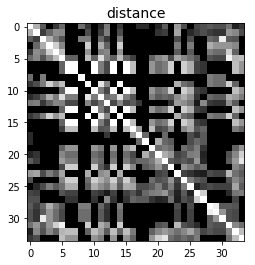

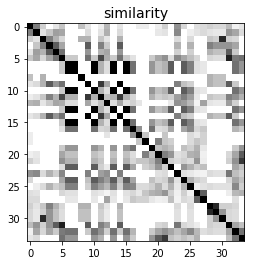

In [33]:
## bais distance calculateion, for adj matrix 
M = pdist(A, 'cosine')                 # it will return a vector, this is using cosine distance
M = squareform(M)                      # convert the vector to a diaganal matrix 
S = 1-M                                # similarity measure = 1 - distance matrix 
## show it in graph 
show_matrix(M,'distance')
show_matrix(S,'similarity')